# ARCH Data Exploration

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BrockDSL/ARCH_Data_Explore/blob/main/arch_explore.ipynb)

### Includes and such

In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

import difflib
from IPython import display

import matplotlib.pyplot as plt
%matplotlib inline

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


### Option 1: Grab zip from GDocs (only need to do once) 

In [ ]:
!curl "https://drive.google.com/file/d/1BHePCdN6ySr4IYY9jq1S4QNjVWgvqyCS/view?usp=sharing" --output web-pages.csv.gz

### Option 2: Grab Zip from Arch (only need to do once)

In [ ]:
curl "https://webdata.archive-it.org/ait/arch:cohort.ribaric/research_services/download/ARCHIVEIT-13781/WebPagesExtraction/web-pages.csv.gz?access=72QSYZMS2SWP7CHSXTU3AXU4MXYDNCOQ" --output web-pages.csv.gz

### Data unpack (only need to do once)

In [4]:
!gunzip -k web-pages.csv.gz

rm: web-pages.csv: No such file or directory
web-pages.csv


In [2]:
web_text = pd.read_csv("web-pages.csv")

In [3]:
print("Data set length: ",len(web_text))

Data set length:  701794


In [4]:
#Changing crawl_data to date object
web_text['crawl_date']= pd.to_datetime(web_text['crawl_date'],format='%Y%m%d')

In [5]:
#rerun to get sample of 25 random entries
web_text.sample(25)

crawl_date                      domain  \
388232 2020-12-11  notlpubliclibrary.org        
597532 2021-05-08  exhibits.library.brocku.ca   
565817 2021-04-17  exhibits.library.brocku.ca   
113857 2020-06-28  youtube.com                  
519408 2021-03-20  discover.brocku.ca           
293187 2020-10-16  portcolborne.ca              
403290 2020-12-25  notl.com                     
565001 2021-04-16  who.int                      
27515  2020-08-04  sb.freeskreen.com            
85288  2020-06-13  discover.brocku.ca           
312665 2020-10-31  brocku.ca                    
232245 2020-09-12  twitter.com                  
556724 2021-04-10  twitter.com                  
544055 2021-04-02  laredoute.com                
24776  2020-07-06  mb.moatads.com               
392032 2020-12-20  discover.brocku.ca           
593307 2021-05-07  niagarahealth.on.ca          
274223 2020-10-02  pinterest.com                
458308 2021-02-06  discover.brocku.ca           
696311 2021-08-06  gobadgers.ca                 
369743 2020-12-05  discover.brocku.ca           
550858 2021-04-09  notl.com                     
429202 2021-01-16  discover.brocku.ca           
652467 2021-06-19  discover.brocku.ca           
194883 2020-08-24  exhibits.library.brocku.ca   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             url  \
388232  https://notlpubliclibrary.org/COVID-19                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
597532  https://exhibits.library.brocku.ca/s/COVID-Niagara/collecting/item/249                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [7]:

#All Domains written out to disk
#web_text['domain'].value_counts().to_csv("top_50.csv")

#Top 50 Domains to Screen
web_text['domain'].value_counts()[0:50]

discover.brocku.ca             195564
twitter.com                    55198 
exhibits.library.brocku.ca     52711 
gncc.ca                        43642 
youtube.com                    41820 
portcolborne.ca                26403 
wainfleet.ca                   18754 
niagaraanglican.ca             17645 
gobadgers.ca                   15953 
stcatharinesstandard.ca        12762 
niagarahealth.on.ca            10340 
niagararegion.ca               9907  
notl.com                       9410  
pelhamlibrary.on.ca            8980  
accounts.google.com            7684  
brocku.ca                      7061  
thehopecentre.net              6759  
pinterest.com                  6514  
niagarafallsreview.ca          6504  
niagarathisweek.com            5619  
thorold.ca                     5588  
tripadvisor.ca                 5460  
m.youtube.com                  5023  
niagaracollege.ca              4897  
eventbrite.ca                  4801  
cbc.ca                         4328  
mozilla.org 

In [8]:
#Data points for domain
domain_mask = "canada.ca"
domain_data = web_text[web_text["domain"] == domain_mask]
print("Total size:", len(domain_data))

Total size: 1377


In [6]:
#rows with language != en are not successful crawls, we can drop those
domain_data = domain_data[domain_data['language'] =='en']
print("Complete rows", len(domain_data))

Complete rows 10884


In [9]:
domain_data.to_csv("canada.csv")

In [214]:
# displaying by date
domain_data.groupby(["crawl_date"]).count()

,domain,url,mime_type_web_server,mime_type_tika,language,content
crawl_date,,,,,,
2020-04-17,345,345,345,345,345,345
2020-04-24,86,86,86,86,86,86
2020-04-25,351,351,351,351,351,351
2020-05-04,635,635,635,635,635,635
2020-05-15,2,2,2,2,2,2
2020-05-16,153,153,153,153,153,153
2020-05-22,349,349,349,349,349,349
2020-05-23,303,303,303,303,303,303
2020-05-27,2,2,2,2,2,2


In [10]:
#displaying by url

#write out to disk
domain_data['url'].value_counts().to_csv("domain_by_urls.csv")

domain_data['url'].value_counts()

https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html                                                                               71
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html                                                                           70
https://www.canada.ca/en/department-finance/economic-response-plan.html                                                                                                  69
https://www.canada.ca/en.html                                                                                                                                            68
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/symptoms.html                                                                  68
                                                                                                                                            

In [28]:
#domain_data.sample(5)

In [20]:
url_mask = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html"
url_data = domain_data[domain_data['url'] == url_mask]

for index, row in url_data.iterrows():
    url_data.at[index,'length'] = int(len(row['content']))



/Users/tim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


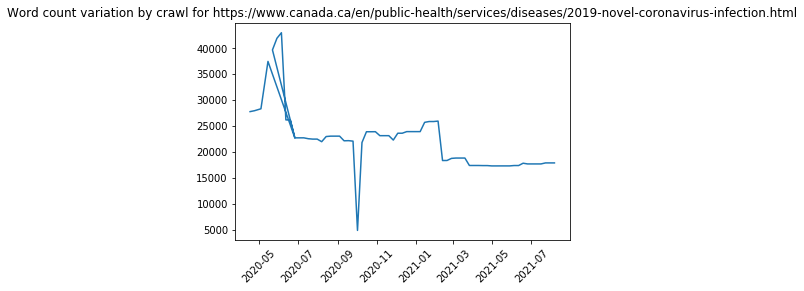

On internet archive:  https://web.archive.org/web/*/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html


In [18]:
plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for " + url_mask)
plt.show()
print("On internet archive: ", "https://web.archive.org/web/*/"+url_mask)

## On cell version

Domain Total size: 26403
Domain Complete rows 24336


/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


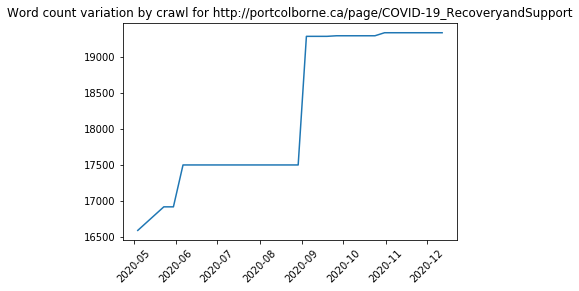

On internet archive:  https://web.archive.org/web/*/http://portcolborne.ca/page/COVID-19_RecoveryandSupport


In [21]:
domain_mask = "portcolborne.ca"
url_mask = "http://portcolborne.ca/page/COVID-19_RecoveryandSupport"

domain_data = web_text[web_text["domain"] == domain_mask]
print("Domain Total size:", len(domain_data))
#rows with language != en are not successful crawls, we can drop those
domain_data = domain_data[domain_data['language'] =='en']
print("Domain Complete rows", len(domain_data))

url_data = domain_data[domain_data['url'] == url_mask]
for index, row in url_data.iterrows():
    url_data.at[index,'length'] = int(len(row['content']))

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for " + url_mask)
plt.show()
print("On internet archive: ", "https://web.archive.org/web/*/"+url_mask)

In [49]:
smallest_version = url_data.min()
largest_version = url_data.max()

url_data.sample(1)

#page_change = difflib.HtmlDiff(tabsize=2)

#with open("difference.html","w") as fp:
#    html = page_change.make_file(fromlines=smallest_version,tolines=largest_version, fromdesc="Smallest Page Size",todesc="largest Page Size") 
#    fp.write(html)
    
#display.HTML(open("difference.html","r").read())


crawl_date           domain  \
141924 2020-07-18  portcolborne.ca   

                                                            url  \
141924  http://portcolborne.ca/page/COVID-19_RecoveryandSupport   

       mime_type_web_server mime_type_tika language  \
141924  text/html            text/html      en        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    